In [426]:
%pip install graphviz

37594.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [427]:
import copy
import graphviz
from graphviz import Digraph
from relatedworkanalyzer import RelatedWorkAnalyzer

In [428]:
rwa = RelatedWorkAnalyzer()

load from pkl


### circo

In [438]:
def drawCitEdges(paperId, color="#0000000f"):
    for paper in rwa.paper_list[paperId]['citations']:
        if paper['paperId'] in rwa.paper_list['keypaper']:
            cited_paper = "{}".format(paperId)
            citing_paper = "{}".format(paper['paperId'])
            #print("{} cited by {}".format(cited_paper, citing_paper))
            s.edge(citing_paper, cited_paper, color=color)
    for paper in rwa.paper_list[paperId]['references']:
        if paper['paperId'] in rwa.paper_list['keypaper']:
            cited_paper = "{}".format(paper['paperId'])
            citing_paper = "{}".format(paperId)
            #print("{} cited by {}".format(cited_paper, citing_paper))
            s.edge(citing_paper, cited_paper, color=color)

def drawSelect(paperId):
    print(rwa.paper_list[paperId]['title'])
    main_node_color = "#000000ff"
    ref_node_color = "#0000ffff"
    cit_node_color = "#ff0000ff"
    s.node(paperId, label=changeLine(rwa.paper_list[paperId]['title']), color=main_node_color, fontcolor=main_node_color)
    for paper in rwa.paper_list[paperId]['citations']:
        if paper['paperId'] in rwa.paper_list['keypaper']:
            citing_paper = "{}".format(paper['paperId'])
            print("{} cited by {}".format(rwa.paper_list[paperId]['title'], rwa.paper_list[citing_paper]['title']))
            s.node(citing_paper, label=changeLine(rwa.paper_list[citing_paper]['title']), color=cit_node_color, fontcolor=cit_node_color)
            s.edge(citing_paper, paperId, color=cit_node_color, style = "dashed")
            s.edge(citing_paper, str(rwa.paper_list[citing_paper]['year']), arrowhead='none', color="#0000004f")
    for paper in rwa.paper_list[paperId]['references']:
        if paper['paperId'] in rwa.paper_list['keypaper']:
            cited_paper = "{}".format(paper['paperId'])
            print("{} cited by {}".format(rwa.paper_list[cited_paper]['title'], rwa.paper_list[paperId]['title']))
            s.node(cited_paper, label=changeLine(rwa.paper_list[cited_paper]['title']), color=ref_node_color, fontcolor=ref_node_color)
            s.edge(paperId, cited_paper, color=ref_node_color, style = "dashed")
            s.edge(cited_paper, str(rwa.paper_list[cited_paper]['year']), arrowhead='none', color="#0000004f")

def changeLine(paper):
    items = paper.split(" ")
    num_words = len(items)
    num_words_per_line = 4
    new_paper = ""
    for i in range(num_words):
        new_paper += items[i]
        if (i+1) % num_words_per_line == 0:
            new_paper += "\\n"
        else:
            new_paper += " "
    return new_paper

In [439]:
# extract year list
years = []
#papers = {}
for paperId in rwa.paper_list['keypaper']:
    year = rwa.paper_list[paperId]['year']
    years.append(year)
    if rwa.paper_list[paperId]['year'] == None:
        print(rwa.paper_list[paperId]['title'])
years = list(set(years))
years

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

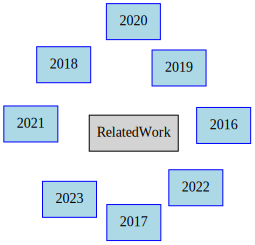

In [440]:
# generate graph
s = graphviz.Digraph('title', filename='test.gv',
                     graph_attr={'layout': 'fdp', 'overlap': 'false'}, # circo, struct, dot
                     node_attr={'shape': 'box'})
s.strict = True
s.node('RelatedWork', shape='box', style='filled', fillcolor='lightgrey')

# generate year nodes
for year in years:
    s.node(str(year), shape='box', color='blue', style='filled', fillcolor='lightblue')
    s.edge('RelatedWork', str(year), arrowhead='none', color='#00000000')
s

In [441]:
# generate keypaper nodes
for paperId in rwa.paper_list['keypaper']:
    year = rwa.paper_list[paperId]['year']
    node_name = changeLine(rwa.paper_list[paperId]['title'])
    s.node(paperId, label=node_name, color="#0000000f", fontcolor="#0000000f")
    s.edge(str(year), paperId, arrowhead='none', color="#0000000f")
    rwa.paper_list[paperId]['node_name'] = node_name
s.view()

'test.gv.pdf'

In [443]:
# generate citation edges
edge_list = {}

for paperId in rwa.paper_list['keypaper']:
    drawCitEdges(paperId)
s.view()
default_graph = copy.deepcopy(s)

Data-Efficient Hierarchical Reinforcement Learning
Data-Efficient Hierarchical Reinforcement Learning cited by Hierarchical Kickstarting for Skill Transfer in Reinforcement Learning
Data-Efficient Hierarchical Reinforcement Learning cited by Skill-based Model-based Reinforcement Learning
Data-Efficient Hierarchical Reinforcement Learning cited by Priors, Hierarchy, and Information Asymmetry for Skill Transfer in Reinforcement Learning
Data-Efficient Hierarchical Reinforcement Learning cited by Learning Transferable Motor Skills with Hierarchical Latent Mixture Policies
Data-Efficient Hierarchical Reinforcement Learning cited by TRAIL: Near-Optimal Imitation Learning with Suboptimal Data
Data-Efficient Hierarchical Reinforcement Learning cited by Hierarchical Policies for Cluttered-Scene Grasping with Latent Plans
Data-Efficient Hierarchical Reinforcement Learning cited by Accelerating Robotic Reinforcement Learning via Parameterized Action Primitives
Data-Efficient Hierarchical Reinfor

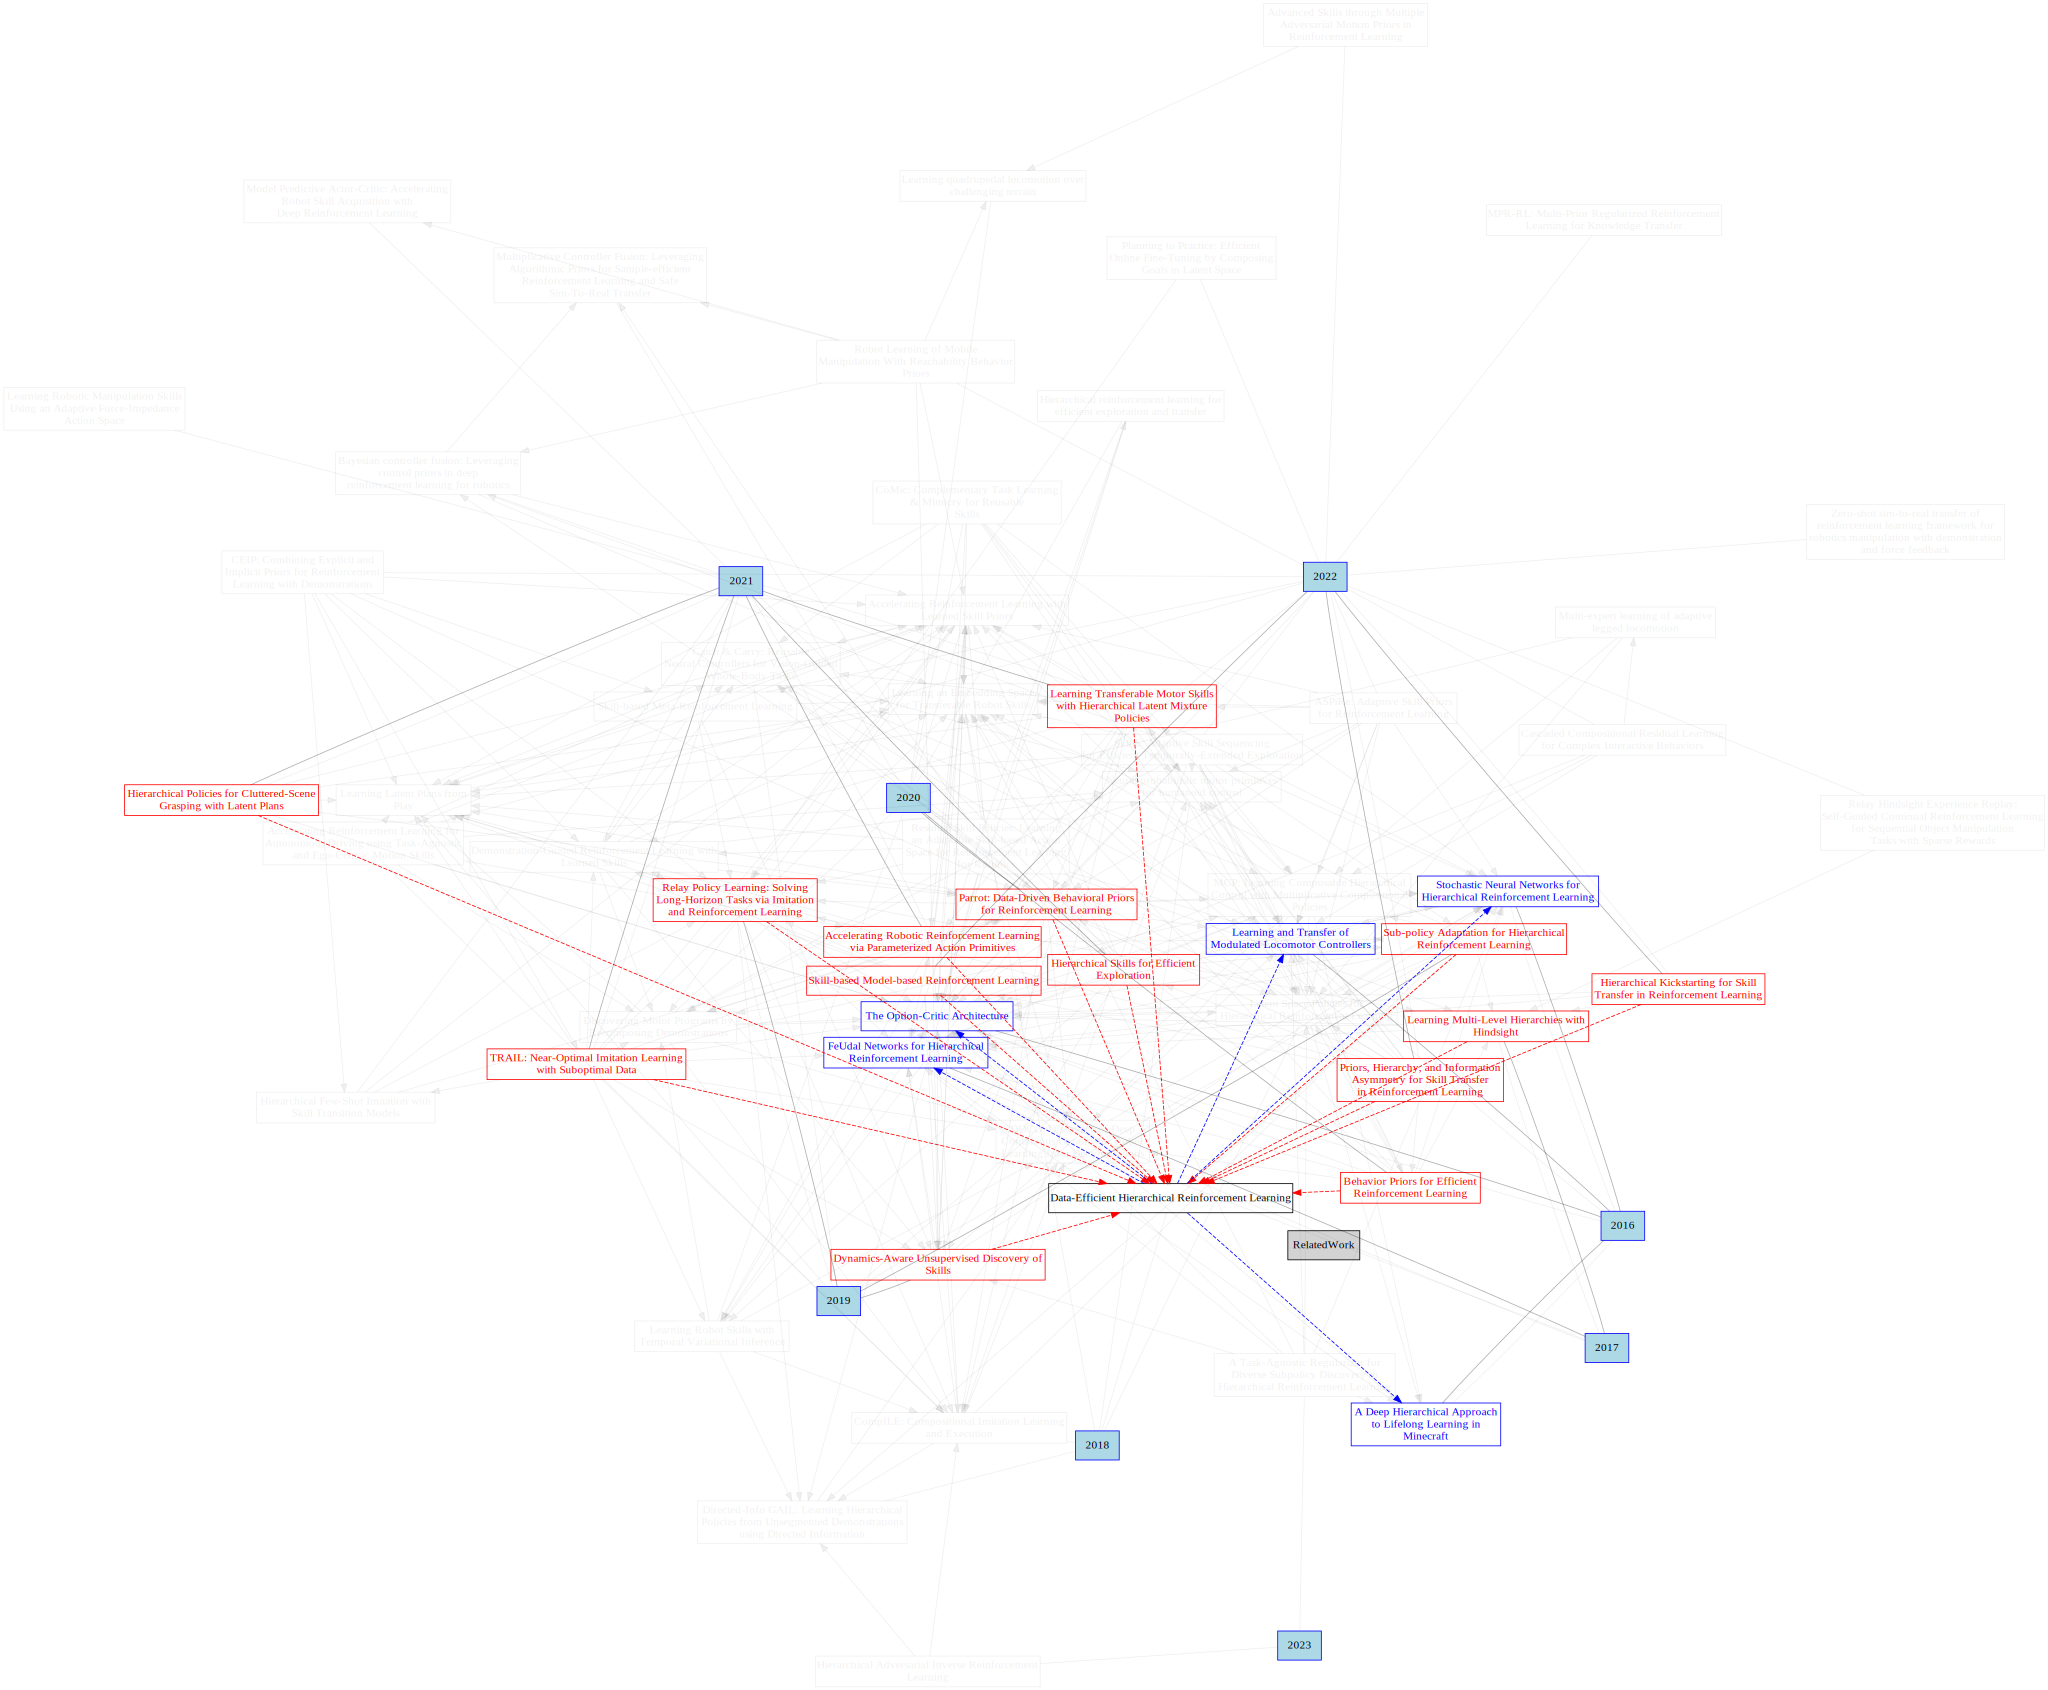

In [444]:
drawSelect('39b7007e6f3dd0744833f292f07ed77973503bfd')
s

In [435]:
# back to default graph
s = copy.deepcopy(default_graph)
#s.view()   